In [ ]:
from src.utils.plot_world_cloud import plot_feature_wordcloud
from src.utils.plot_time_distribution import *
from src.utils.sunburst import *
from src.scripts.rf_importance import *

In [3]:
from src.data.dataloader import load_data, extend_properties, timestamp

#List of all LIWC and text characteristics needed to extend properties.
LIWC_list = [
    "LIWC_Funct", "LIWC_Pronoun", "LIWC_Ppron", "LIWC_I",
    "LIWC_We", "LIWC_You", "LIWC_SheHe", "LIWC_They", "LIWC_Ipron",
    "LIWC_Article", "LIWC_Verbs", "LIWC_AuxVb", "LIWC_Past", "LIWC_Present",
    "LIWC_Future", "LIWC_Adverbs", "LIWC_Prep", "LIWC_Conj", "LIWC_Negate",
    "LIWC_Quant", "LIWC_Numbers", "LIWC_Swear", "LIWC_Social", "LIWC_Family",
    "LIWC_Friends", "LIWC_Humans", "LIWC_Affect", "LIWC_Posemo", "LIWC_Negemo",
    "LIWC_Anx", "LIWC_Anger", "LIWC_Sad", "LIWC_CogMech", "LIWC_Insight",
    "LIWC_Cause", "LIWC_Discrep", "LIWC_Tentat", "LIWC_Certain", "LIWC_Inhib",
    "LIWC_Incl", "LIWC_Excl", "LIWC_Percept", "LIWC_See", "LIWC_Hear",
    "LIWC_Feel", "LIWC_Bio", "LIWC_title", "LIWC_Health", "LIWC_Sexual",
    "LIWC_Ingest", "LIWC_Relativ", "LIWC_Motion", "LIWC_Space", "LIWC_Time",
    "LIWC_Work", "LIWC_Achiev", "LIWC_Leisure", "LIWC_Home", "LIWC_Money",
    "LIWC_Relig", "LIWC_Death", "LIWC_Assent", "LIWC_Dissent", "LIWC_Nonflu",
    "LIWC_Filler"
]

text_features=["num_chars","num_chars_no_space","frac_alpha","frac_digits","frac_upper","frac_space","frac_special",
"num_words","num_unique_words","num_long_words","avg_word_len","num_unique_stopwords","frac_stopwords",
"num_sentences","num_long_sentences","avg_chars_per_sentence","avg_words_per_sentence","automated_readability",
"vader_pos","vader_neg","vader_compound"] 

properties_name = text_features + LIWC_list

#This function will open and clean the data.
df_title, df_body = load_data()  

<unknown>:27: SyntaxWarning: invalid escape sequence '\w'
<unknown>:27: SyntaxWarning: invalid escape sequence '\w'


In [4]:
import pandas as pd

#This function will extend the properties from the original dataset to a new one to access easily the column.
df_title = extend_properties(df_title, properties_name)
df_body = extend_properties(df_body, properties_name)


#This function will transform the TIMESTAMP of the original data and extend it to have access to different timestamps.
df_title=timestamp(df_title)
df_body=timestamp(df_body)

#Concatenate the two datasets into one
df=pd.concat([df_title, df_body], axis=0)

In [48]:
# Create Sun Burst plot of LIWC  features
from src.utils.sunburst import *
create_liwc_sunburst(df, LIWC_list)


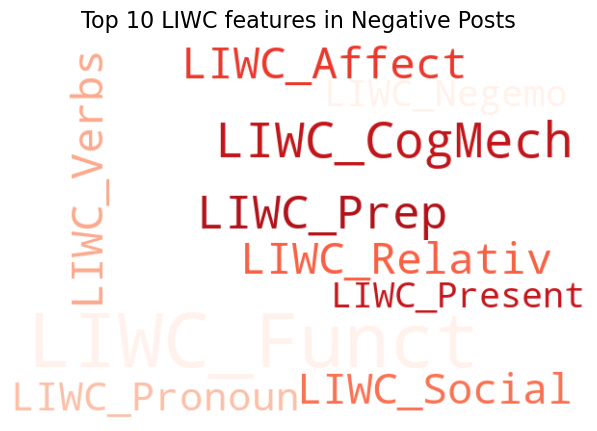

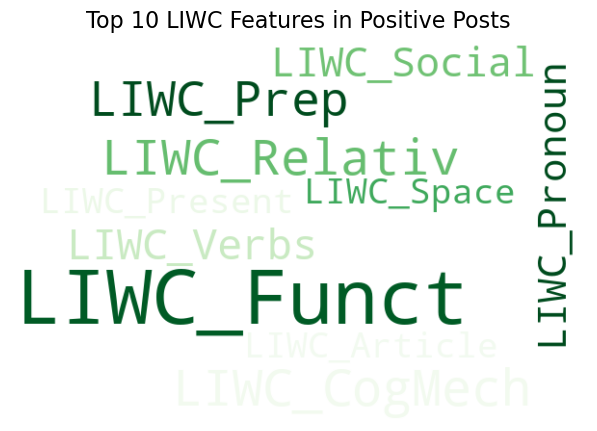

In [25]:
# Plot world clouds to visualized most used LIWC features 

# Plot for negative features
plot_feature_wordcloud(df, LIWC_list,  "Top 10 LIWC features in Negative Posts", "negative_world_cloud.png", link_sentiment=-1, color='Reds')

# Plot for positive features
plot_feature_wordcloud(df, LIWC_list, "Top 10 LIWC Features in Positive Posts", "positive_world_cloud.png", link_sentiment=1, color='Greens')

In [29]:
# Daily analysis of LIWC features changes
plot_daily_evolution(df_title)
# Monthly LIWC variation 
monthly_liwc_variation(df)
#Yearly conflict evolution
plot_yearly_evolution(df)

In [ ]:
# Random forest importance of LIWC features in negativity post
random_forest(df, text_features, LIWC_list)

In [30]:
from src.scripts.conflict_definition import *
#this function will pair target and source where a negative hyperlink happen to define a conflict
dict_df_by_target, dict_df_by_source, neg_pair_conflict_hour = pair_conflict(df, properties_name)

In [50]:
from src.scripts.t_test_deltaLIWC import *
# This function will give the delta of LIWC features after an attack
df_timeseries = delta_LIWC_timeseries(
        dict_df_by_target=dict_df_by_target,
        dict_df_by_source=dict_df_by_source,
        neg_pair_conflict_hour=neg_pair_conflict_hour,
        properties_name=properties_name,
        window_segments=[(0, 2), (2, 6), (6, 12), (12, 24), (24, 48)]  
    )
    

Building LIWC timeseries with multiple segments


Building panel: 100%|██████████| 80506/80506 [14:49<00:00, 90.49it/s]  


In [ ]:
# Analysis recovery of LIWC after an attack and plot histogram of it 
from src.scripts.recovery_analysis import *
from src.utils.plot_recovery import * 


interesting_features = [
    'Negemo', 'Posemo', 'Anx', 'Anger', 'Sad', 'Social',
    'CogMech', 'Assent', 'Dissent', 'Swear'
]
recovery_df=  visualize_liwc_recovery(df_timeseries, interesting_features)
stats_df= plot_recovery_histogram(recovery_df,  interesting_features)
#'images/liwc_delta_analysis.html', 'images/liwc_recovery_rate.html',images/recovery_histogram.html'


TOP 5 FEATURES WITH LARGEST INCREASES:
  • Negemo: +0.0002 (Recovery: 12.1h)
  • Swear: +0.0000 (Recovery: 11.7h)
  • Anger: +0.0000 (Recovery: 11.9h)
  • Sad: +0.0000 (Recovery: 11.6h)
  • Anx: +0.0000 (Recovery: 11.6h)

 TOP 5 FEATURES WITH LARGEST DECREASES:
  • Social: -0.0003 (Recovery: 12.3h)
  • CogMech: -0.0001 (Recovery: 12.2h)
  • Dissent: -0.0000 (Recovery: 11.6h)
  • Posemo: -0.0000 (Recovery: 12.0h)
  • Assent: -0.0000 (Recovery: 11.6h)

 FASTEST RECOVERING FEATURES:
  • Dissent: 11.6h to recover
  • Assent: 11.6h to recover
  • Anx: 11.6h to recover
  • Sad: 11.6h to recover
  • Swear: 11.7h to recover

 FEATURES THAT OFTEN DON'T RECOVER:
  • CogMech: 9992/26568 never recovered
  • Social: 8973/26568 never recovered
  • Posemo: 7326/26568 never recovered
  • Negemo: 5823/26568 never recovered
  • Anger: 3967/26568 never recovered


In [ ]:
from src.scripts.attacker_impact import *

display(df_timeseries)
# Analysis of the impact of the LIWC of the attackants of LIWC of the targetted subreddits 
results_overall = attacker_impact_analysis(
    df_timeseries, 
    interesting_features
)
#influential-attack.html, attack_LIWC_correlation.html

source        target  ... delta_LIWC_Filler  incoming_LIWC_Filler
0              procss   100yearsago  ...          0.000000              0.000000
1      subredditdrama  1200isplenty  ...          0.007923              0.000000
2      subredditdrama  1200isplenty  ...          0.007923              0.000000
3      subredditdrama     2007scape  ...          0.000000              0.000000
4      subredditdrama     2007scape  ...          0.006250              0.003185
...               ...           ...  ...               ...                   ...
46472  subredditdrama           zen  ...          0.000000              0.000000
46473          bestof           zen  ...          0.000000              0.000000
46474  subredditdrama           zen  ...          0.000000              0.000000
46475  subredditdrama           zen  ...         -0.002163              0.000000
46476           drama           zen  ...          0.000000              0.000000

[46477 rows x 178 columns]


 Most influential attacker feature: 'Swear' (avg |r| = 0.008)

 Top 5 attacker→target correlations:
   1. Swear → Assent: r = 0.015 (p = 0.0015)
   2. Assent → Sad: r = 0.015 (p = 0.0017)
   3. Anx → Negemo: r = -0.014 (p = 0.0022)
   4. Swear → Social: r = -0.013 (p = 0.0040)
   5. Anx → Anger: r = -0.013 (p = 0.0040)


In [ ]:
from src.scripts.granger_analysis import *
from src.utils.plot_granger import *
# This function will run a granger analysis on the 20 most targetted subreddits to study causality

records = granger_analysis(df)
plot_results(records)
#granger_analysis.html

Cluster analysis

In [55]:
from src.models.louvain import *
# Louvain for the entire dataset (example with title)
G_all = build_network(df_title)
partition_all = compute_louvain(G_all)
print("Total number of communities using Louvain:", count_communities(partition_all))



Total number of communities using Louvain: 825


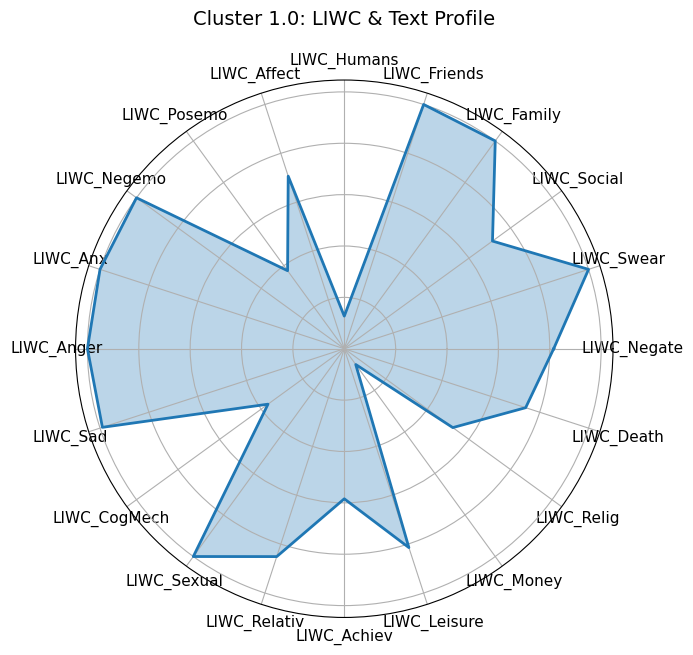

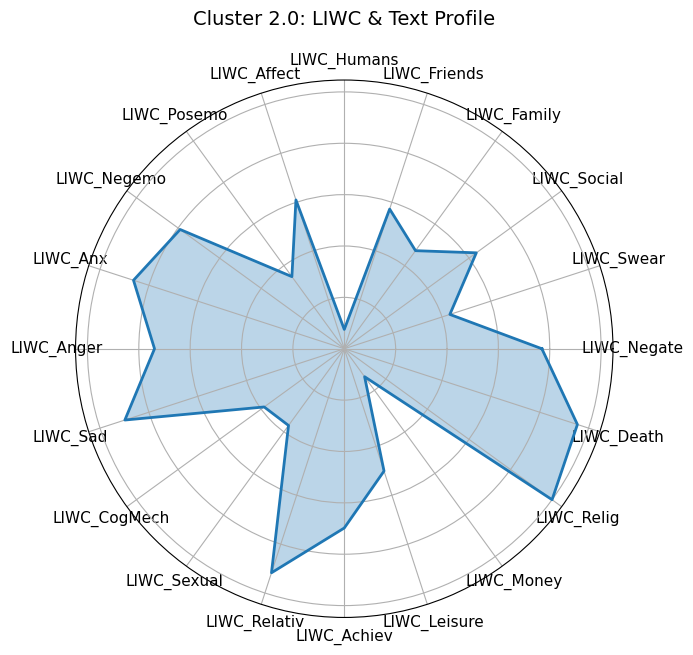

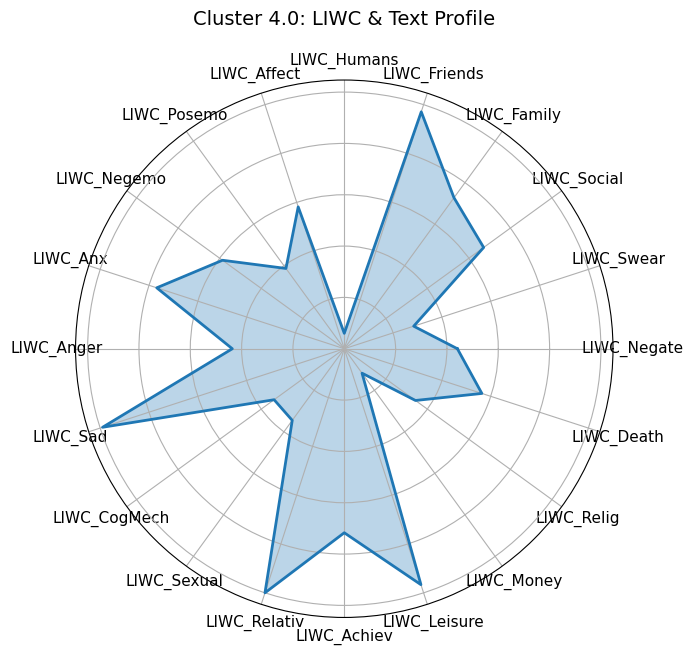

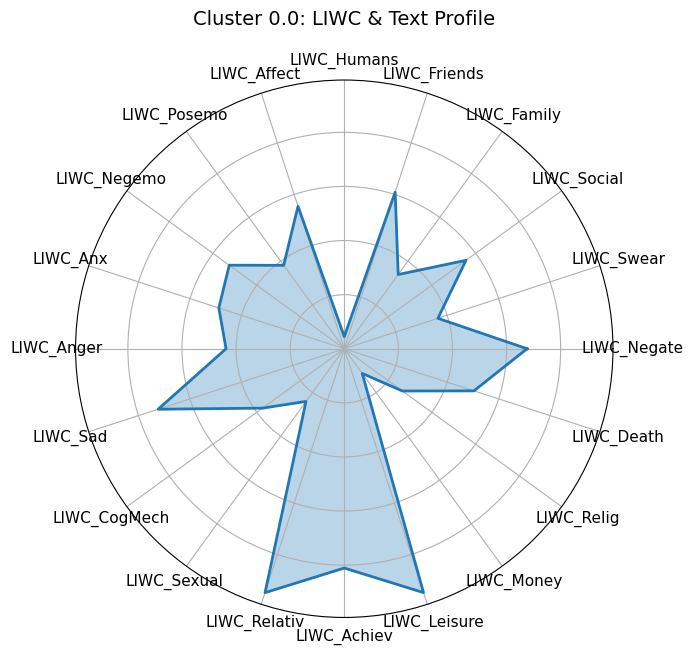

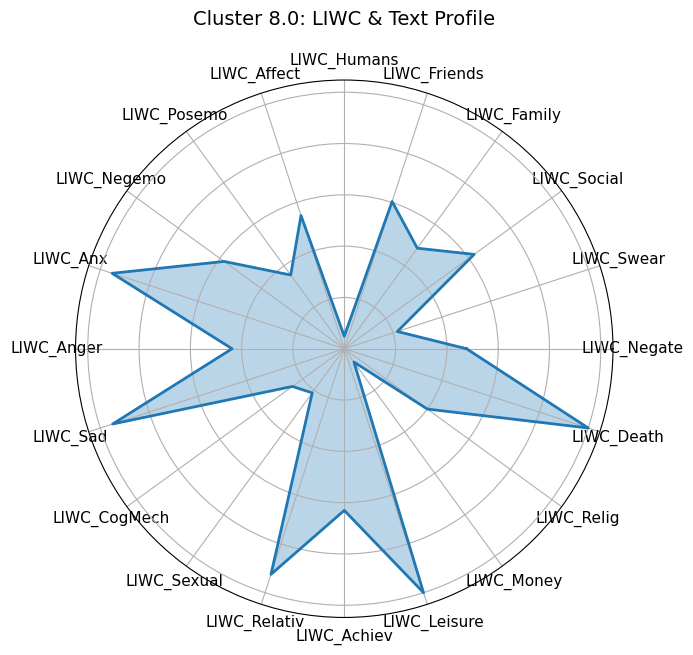

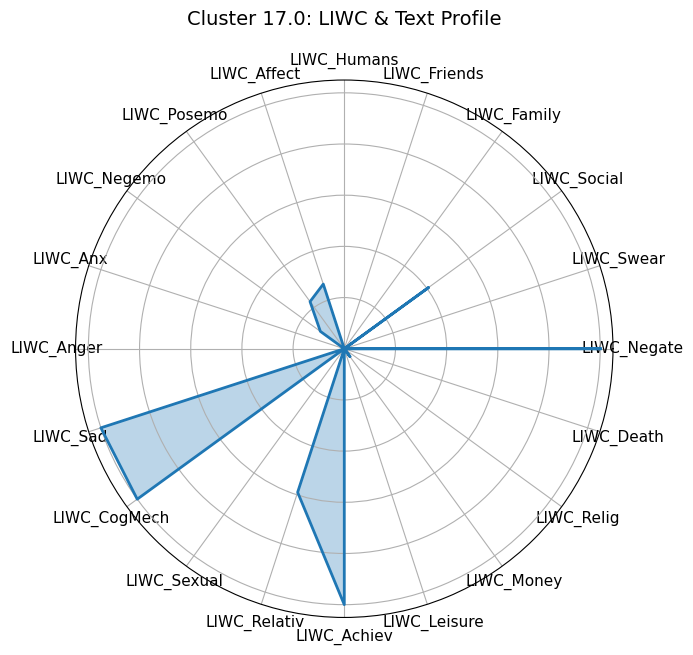

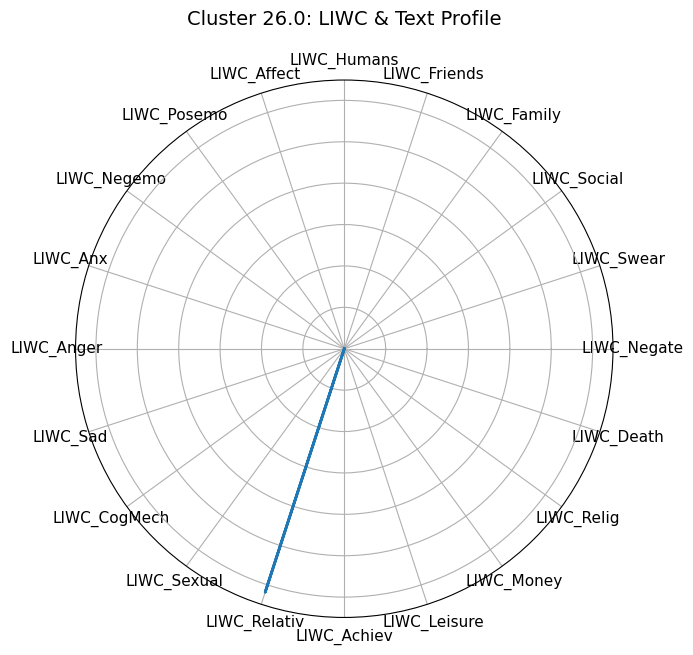

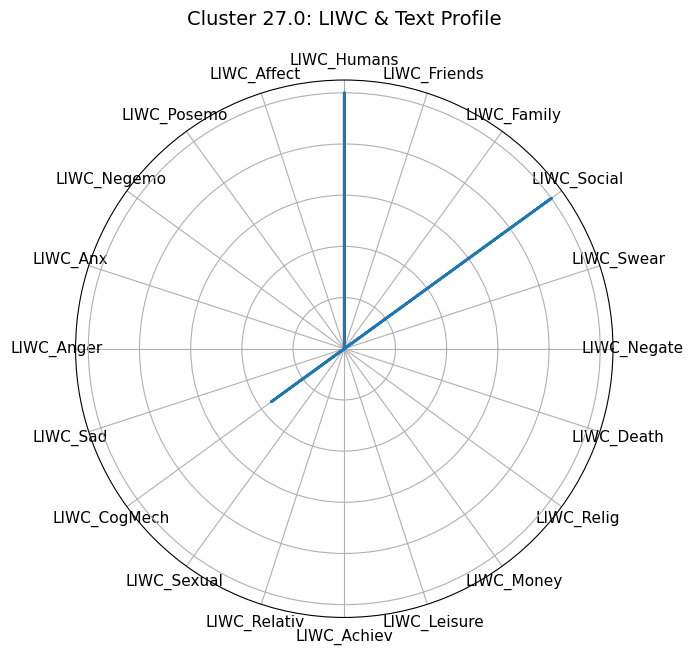

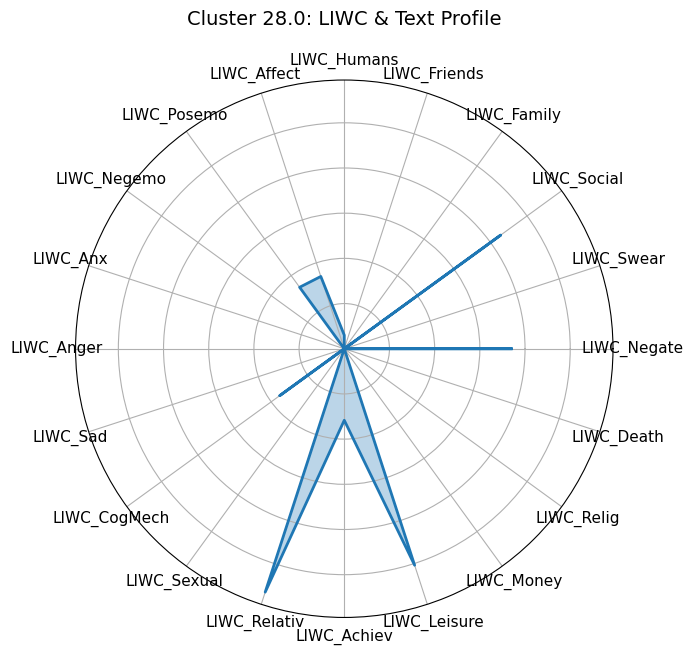

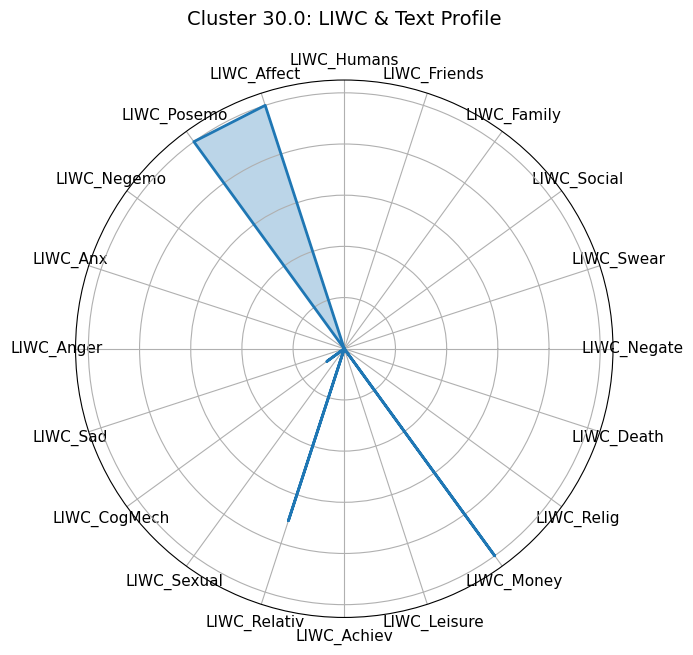

In [57]:
from src.scripts.cluster_profile import *
# Radar plot of baseline LIWC 

# Map cluster assignment
df["cluster_source"] = df["SOURCE_SUBREDDIT"].map(partition_all)
df["cluster_target"] = df["TARGET_SUBREDDIT"].map(partition_all)

# Call the function that create cluster profile and plot the radar plot of the 5 clusters with higher number of conflict and the 5 with lower number of conflict
cluster_norm, cluster_to_subreddits=cluster_profiles(df, partition_all)

In [ ]:
from src.utils.plot_radar import *
# Quiz game: Guess the cluster from its LIWC profile
quiz(cluster_norm, cluster_to_subreddits, properties_name)

In [ ]:
from src.utils.plot_race import *
# Plot cluster activity through time
create_cluster_race_plot(df_title, timestamp_col='TIMESTAMP')

In [58]:
from src.scripts.cluster_analysis import *
cluster_analysis(df)

KeyboardInterrupt: 